<a href="https://colab.research.google.com/github/jerry14771/Bike-Sharing-Demand-Prediction/blob/main/Rohit_Raj_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Step 1. Importing dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Bike Sharing Demand Prediction/Copy of SeoulBikeData.csv', encoding='iso-8859-1')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# checking values of all columns and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# checking for null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Checking distribution of columns.**

In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
df_1 = df.copy()

# **Step 2. EDA**

## **(a). Checking the count of rented bikes per hour, daily and monthly basis.**







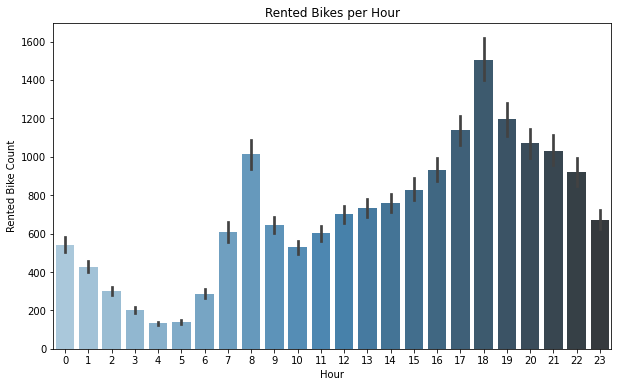

In [9]:
# plotting count of rented bikes per hour.
plt.figure(figsize=[10,6])
plt.title('Rented Bikes per Hour')
sns.barplot(data=df, x='Hour', y='Rented Bike Count', palette="Blues_d")

In [10]:
# changing Date column to datetime dataype.
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [11]:
# creating month and weekday columns.
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

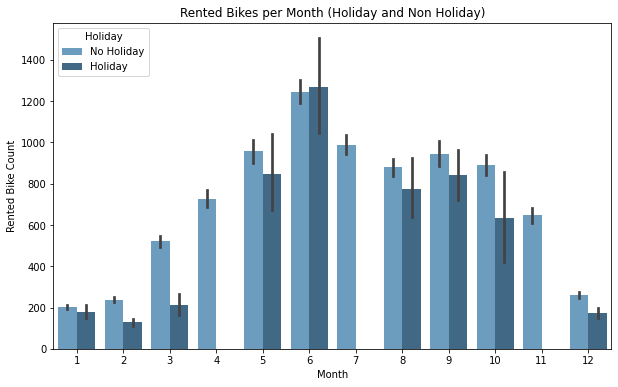

In [12]:
# plotting rented bike count on the basis of months.
plt.figure(figsize=[10,6])
plt.title('Rented Bikes per Month (Holiday and Non Holiday)')
sns.barplot(data=df, x='Month', y='Rented Bike Count', hue='Holiday', palette="Blues_d")

In [13]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday


Text(0, 0.5, 'Rented Bike Count')

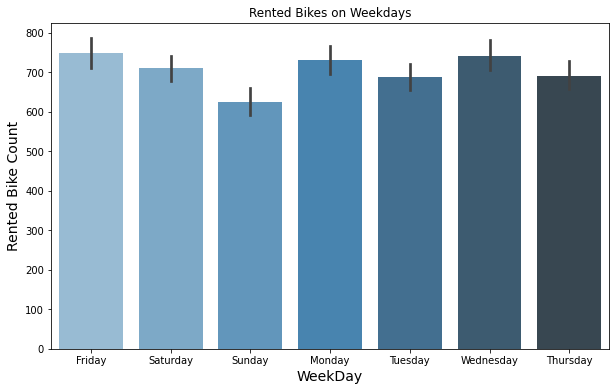

In [14]:
# plotting rented bike count on Weekdays.
plt.figure(figsize=[10,6])
plt.title('Rented Bikes on Weekdays')
sns.barplot(data=df, x='Weekday', y='Rented Bike Count', palette="Blues_d")
plt.xlabel('WeekDay', fontsize = 14)
plt.ylabel('Rented Bike Count', fontsize = 14)



*   **Bikes are mostly rented at 8am and between 5pm to 8pm (peaking at 6pm).**
*   **On the monthly basis, bikes are mostly rented May to November i.e. Spring to Autumn, while peaking in Summer month of June.**
*   **The demand for bikes is pretty much consistent throughout the week only dipping on Sunday.**



## **(b). Checking how is the demand for bikes affected by Weather.**



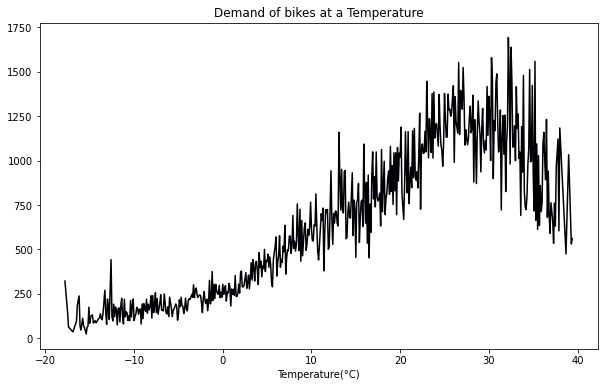

In [15]:
# plotting the affect of temperature on demand of bikes.
df.groupby('Temperature(°C)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a Temperature', colormap='inferno')

In [16]:
# The graph for dew point temperature and temperature seems very similar. This means that we'll be fine with either of them.

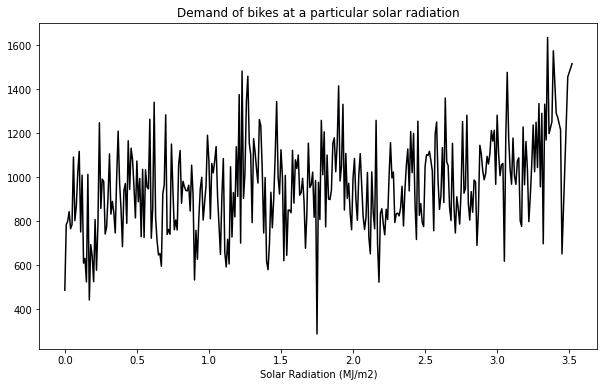

In [17]:
# Solar Radiation vs Count of rented bikes
df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a particular solar radiation', colormap='inferno')

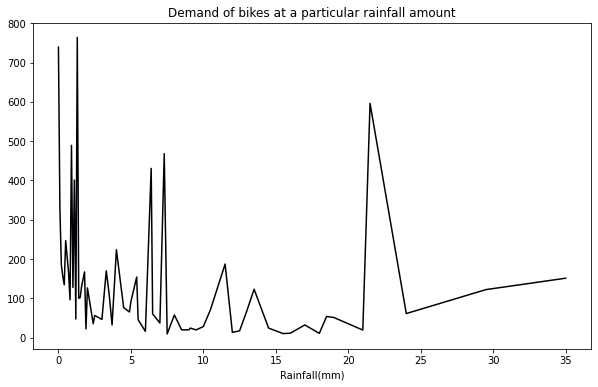

In [18]:
# Rainfall vs Count of rented bikes
df.groupby('Rainfall(mm)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a particular rainfall amount',colormap='inferno')

## *The peak between 20 and 25 seems out of place, but on refering to the dataset we find it to be normal.*

In [19]:
df[(df['Rainfall(mm)'] >=21) & (df['Rainfall(mm)'] <=24)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6,Thursday
5132,2018-07-02,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,7,Monday
6524,2018-08-29,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,8,Wednesday


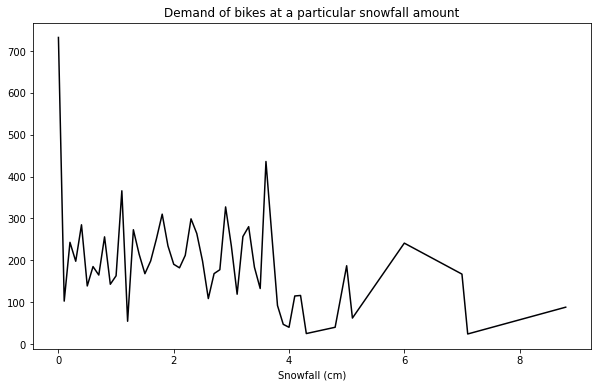

In [20]:
# Rainfall vs Count of rented bikes
df.groupby('Snowfall (cm)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a particular snowfall amount', colormap='inferno')

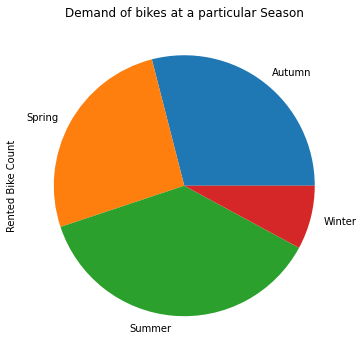

In [21]:
# Season wise demand of bikes.
df.groupby('Seasons')['Rented Bike Count'].sum().plot(kind='pie', figsize=[10,6], title='Demand of bikes at a particular Season')



*   **The demand for bikes is pretty high between 25°C and 35°C. The graph for Temperature and Dew point Temperature is same.**
*   **The demand decreases when it rains or snows.**

*   **In presence of solar radiation i.e. day, the demand remains nearly constant**
*   **Most demanding season is Summer, followed by Autumn and Spring.**





## **(c). Correlation**

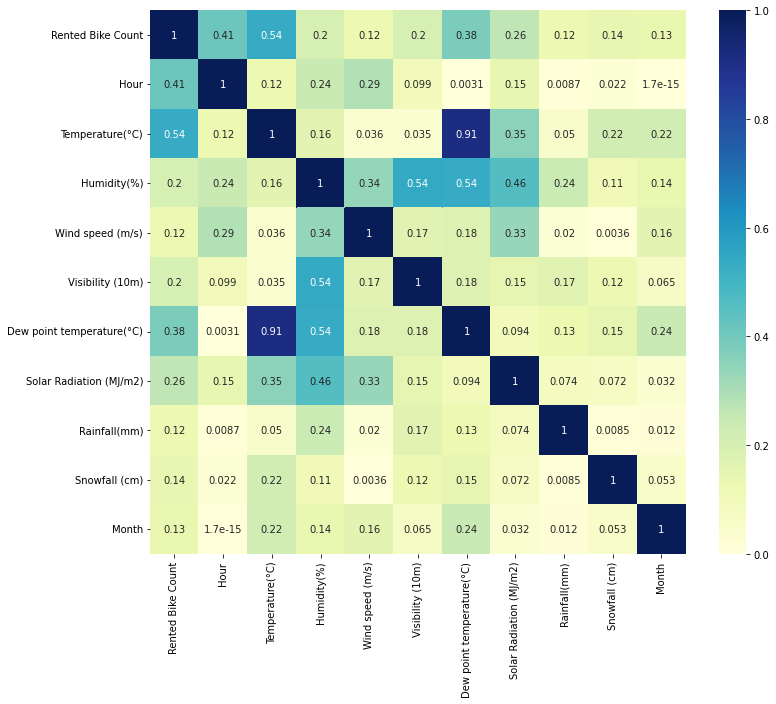

In [22]:
# plotting heatmap
plt.figure(figsize=[12,10])
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGnBu')

* **Rental Bike Count is mostly correlated with Hour and Temperature.**
* **Temperature and Dew point Temperature are highly correlated.**

## **(d). Taking a closer look at columns.**

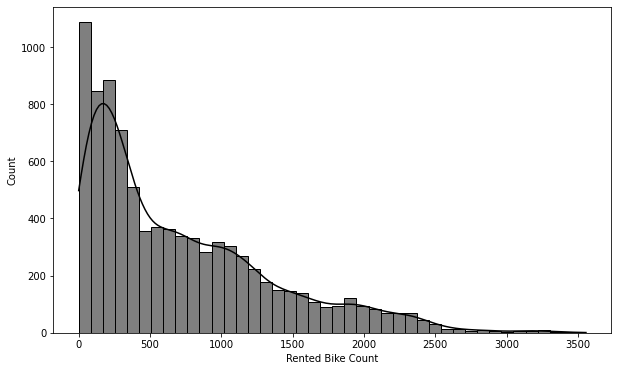

In [23]:
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Rented Bike Count', kde=True, color='black')

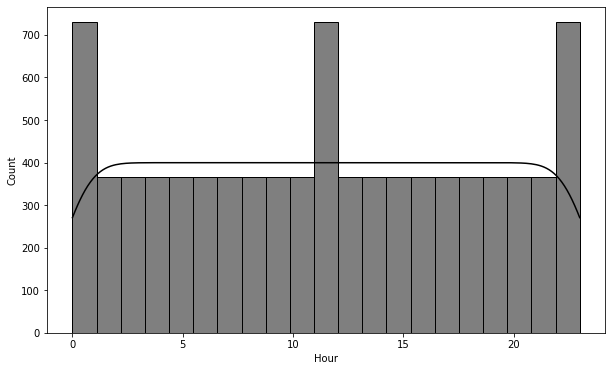

In [24]:
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Hour', kde=True, color='black')

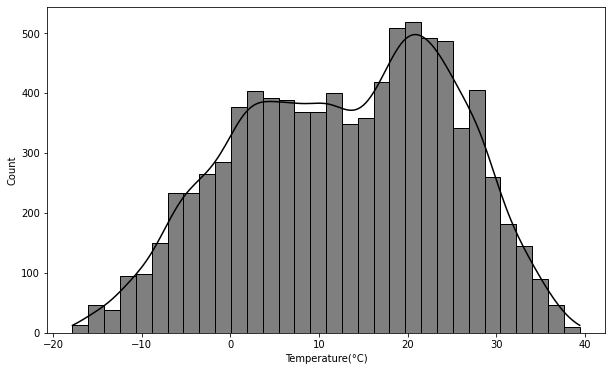

In [25]:
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Temperature(°C)', kde=True, color='black')

## **(e). Hourly bike rented in different seasons.**

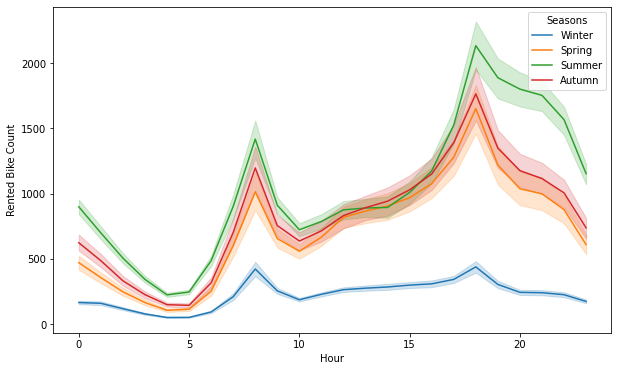

In [26]:
plt.figure(figsize=[10,6])
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')

## In each season, the demand peaks around 8am and 6pm(highest).

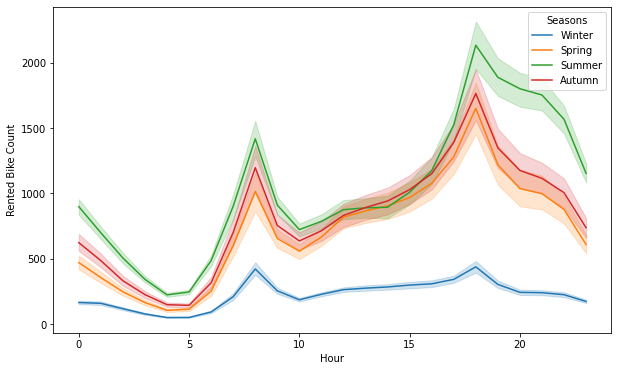

In [27]:
plt.figure(figsize=[10,6])
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')

## **(f). Here showing the high correlation of Temperature and Dew point Temperature**

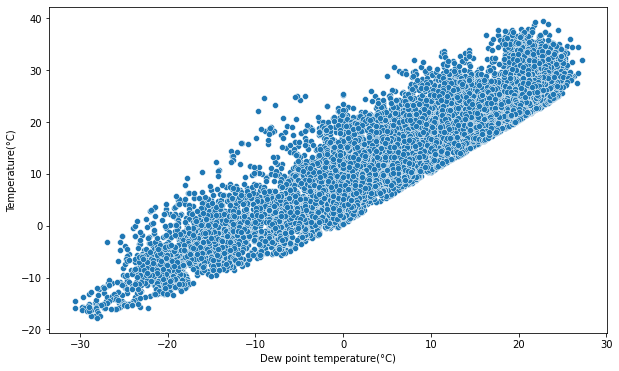

In [28]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df, y='Temperature(°C)', x='Dew point temperature(°C)')

# **Step 3. Data Preparation.**

In [29]:
df['Functioning Day'] = df['Functioning Day'].replace({'Yes':1, 'No':0})

In [30]:
df['Holiday'] = df['Holiday'].replace({'Holiday':1, 'No Holiday':0})

In [31]:
new_df= pd.get_dummies(df[{'Seasons','Weekday'}], drop_first=True)

In [32]:
list_of_df = [df,new_df]
df=pd.concat(list_of_df, axis=1)
df.drop(['Seasons','Weekday'], axis=1, inplace=True)

---

#Outlier-Treatment

In [33]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Month', 'Weekday_Monday', 'Weekday_Saturday',
       'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday',
       'Weekday_Wednesday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

In [34]:
df=df[df['Rented Bike Count']<2400]

------------

#Selecting Features and splitting in train and test.

In [35]:
column_to_drop = {'Dew point temperature(°C)','Humidity(%)','Rented Bike Count','Date','Month'}

In [36]:
cols = list(set(df.columns)-column_to_drop)

In [37]:
X= df[cols]

In [38]:
Y= df['Rented Bike Count']

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=[cols])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=3,test_size=0.25)

In [43]:
scaler = StandardScaler()
x_train_ = scaler.fit_transform(x_train)
x_test_ = scaler.transform(x_test)

#Models Implementation

Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
import math

In [47]:
regressor = LinearRegression()
regressor.fit(x_train_, y_train)

LinearRegression()

In [48]:
y_pred= regressor.predict(x_test_)

In [49]:
print(mse(y_test,y_pred))
print(math.sqrt(mse(y_test,y_pred)))
print(r2(y_test,y_pred))

159039.9654747625
398.79815129306013
0.5420417425611868


----

Lasso Regression with Hyper-parameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV as rscv
from sklearn.model_selection import GridSearchCV as gsv

In [51]:
from sklearn import linear_model
clf = linear_model.Lasso()

In [52]:
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
grid['max_iter'] = [25,50,100,500,1000]

In [53]:
clf=gsv(estimator=clf, param_grid=grid,cv=5 ,verbose=1, scoring='r2')

In [54]:
clf.fit(x_train_,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

In [55]:
print(clf.best_estimator_,clf.best_score_)

Lasso(alpha=0.1, max_iter=25) 0.5338751882120322


--------

Lasso with tuned hyper-parameter

In [56]:
clf2 = linear_model.Lasso(alpha=0.1, max_iter=50)

In [57]:
clf2.fit(x_test_,y_test)

Lasso(alpha=0.1, max_iter=50)

In [58]:
y_pred=clf2.predict(x_test_)

In [59]:
print(mse(y_test,y_pred))
print(math.sqrt(mse(y_test,y_pred)))
print(r2(y_test,y_pred))

157667.69765447485
397.0739196352171
0.5459932108467984


----

Ridge Regression

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge=Ridge()

In [62]:
ridge.fit(x_train_,y_train)

Ridge()

In [63]:
y_pred=ridge.predict(x_test_)

In [64]:
print(mse(y_test,y_pred))
print(math.sqrt(mse(y_test,y_pred)))
print(r2(y_test,y_pred))

159042.39977952585
398.8012033325951
0.5420347329396481


Ridge Hper-Parameter Tuning

In [65]:
clf = linear_model.Ridge()

In [66]:
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
grid['max_iter'] = [25,50,100,500,1000]

In [67]:
clf=gsv(estimator=clf, param_grid=grid,cv=5 ,verbose=1, scoring='r2')

In [68]:
clf.fit(x_train_,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

In [69]:
print(clf.best_estimator_,clf.best_score_)

Ridge(alpha=0.99, max_iter=25) 0.533875193059199


Tuned Ridge

In [70]:
model = linear_model.Ridge(alpha=0.99, max_iter=25)

In [71]:
model.fit(x_train_,y_train)

Ridge(alpha=0.99, max_iter=25)

In [72]:
y_pred = model.predict(x_test_)

In [73]:
r2(y_test,y_pred)

0.5420348031980748